<a href="https://colab.research.google.com/github/Rheza57/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 80


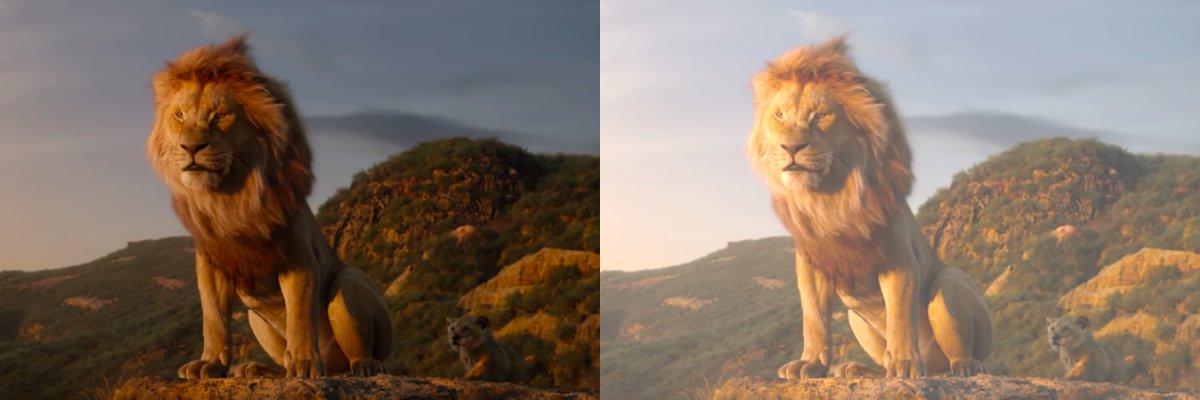

In [5]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/sembarang.png')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan[-255 - 255]: 200
Masukkan kontras [1.0 - 3.0]1.5


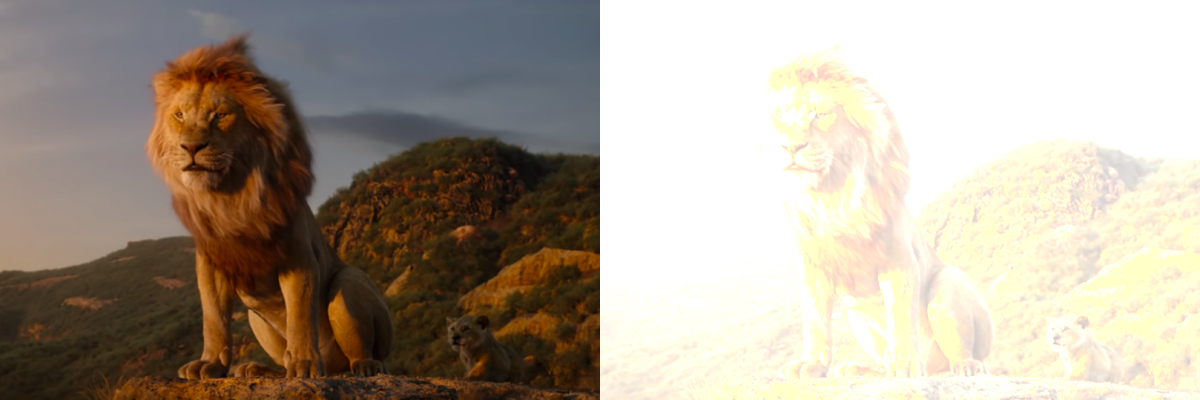

In [6]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]'))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/sembarang.png')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

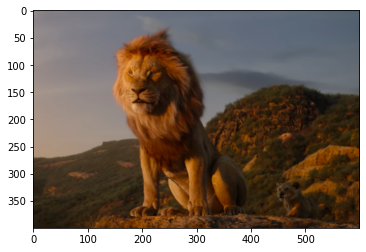

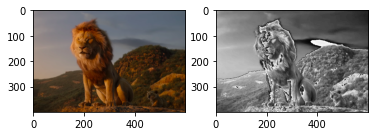

In [7]:
img = cv.imread('/content/drive/MyDrive/sembarang.png')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
gray_img = ( R + G + B) / 0.3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

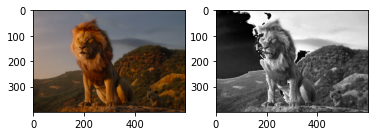

In [8]:
# ekstraksi 3 channel warna
# image[x,y,c]
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) #np.max(color_img, axis=2)
min_channels = np.minimum(np.minimum(R, G), B) #np.min(color_img, axis=2)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

[[134.9896 134.9896 134.777  ...  91.8166  92.604   92.5318]
 [135.6326 135.6326 135.6326 ...  92.604   92.604   92.3914]
 [137.42   137.42   136.6326 ...  92.604   92.604   92.604 ]
 ...
 [ 28.69    28.69    28.69   ...  37.6584  45.514   56.3604]
 [ 28.047   28.7622  28.5496 ...  43.4326  49.2922  56.7856]
 [ 27.1192  27.1192  27.8344 ...  42.7094  40.7856  52.4274]]


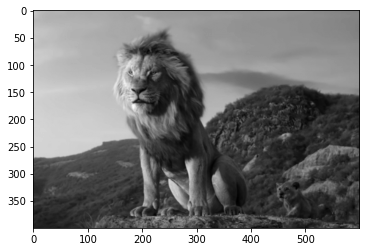

In [9]:
fix_img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
plt.imshow(fix_img)

#Let's extract the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]
Z = 0.2126 * R + 0.7152 * G + 0.0722 * B
print(Z)

plt.imshow(Z, cmap='gray')
plt.savefig('original')